# Volume d'une sphère

On considère un nuage de points $(x, y)$ dans un plan 2D. Les variables $x$ et $y$ sont indépendantes et uniformément reparties entre -1 et 1.

1. En utilisant la fonction ``np.random.rand``, créer un nuage de $M$ points et tracer 
ce nuage. On pourra prendre $M=1000$

2. Tracer dans une autre couleur les points dans un cercle de rayon 1. 

3. En prenant $M$ assez grand (par exemple $10^8$), calculer la probabilité d'être dans le cercle. En déduire une estimation de la surface d'un disque de rayon 1. 

4. Même question que la question 3, mais dans un espace de dimension $N$. Par exemple $N=5$. On écrira une fonction.

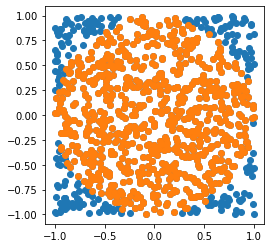

In [1]:
import numpy as np
import matplotlib.pyplot as plt

M = 1000
X, Y = 2*np.random.rand(M)-1, 2*np.random.rand(M)-1

fig = plt.figure()
ax = fig.subplots(1, 1)
ax.set_aspect(1)

ax.plot(X, Y, 'o')

mask = X**2 + Y**2<=1

ax.plot(X[mask], Y[mask], 'o')

In [2]:
M = 100000000
X, Y = 2*np.random.rand(M)-1, 2*np.random.rand(M)-1
# Il est possible d'utiliser la fonction np.random.uniform(-1, 1, size=M)


mask = (X**2 + Y**2)<=1 # C'est un tableau de Booléens. 
vol = 2**2 * np.mean(mask) 
# Le volume est celui du carré (=2^2) 
# multiplié par la probabilité d'être dans le disque
# Lors des opération de somme (ou moyenne) d'un tableau de Booléens, 
# numpy va considérer que `False` vaut 0 et `True` 1.
print(f'Le volume est estimé à {vol:.5f}')

Le volume est estimé à 3.14173


In [3]:
def volume(M, N=2):
    P = 2*np.random.rand(M, N)-1
    Psquare = np.sum(P**2, axis=1)
    vol = 2**N * np.mean(Psquare<1)
    return vol

vol15 = volume(10000000, N=5)

print(f"Le volume d'une hyper-sphère de dimension 5 est estimé à {vol15:.5f}")

Le volume d'une hyper-sphère de dimension 5 est estimé à 5.26846


# Analyse des données du CAC 40

Télécharger depuis le site https://www.abcbourse.com/download/valeur/PX1p les données du CAC 40 depuis 2 ans. On laissera le format 'Action bourse'.  Le fichier texte obtenu contient : l'identifiant de la valeur, la date, le cours d'ouverture, le plus haut, le plus bas, le cours de clôture et le volume de titres échangés. Ce contenu est séparé par des `;`.

Remarque : la méthode `split` d'une chaine de caractère permet de la séparer en plusieurs sous chaînes. Par exemple : 

```
s = '12;bonjour;3.14'
print(s.split(';'))
```




1. Afficher les 10 premières lignes du fichier

2. Créer une liste contenant le plus haut de la bourse jour par jour. Qu'elle est la valeur la plus haute du CAC 40 au cours des deux dernières années ?

3. Écrire une fonction qui prend le jour, le mois et l'année et renvoie une chaîne de caractère pour la date sous la forme : jj/mm/aa (par exemple 11/02/19)

4. Écrire une fonction qui renvoie le plus bas d'une journée à partir du jour, du mois et de l'année. Cette fonction renverra une exception si le jour n'existe pas. 

5. Plutôt qu'une liste, on va utiliser un dictionnaire dont la clé sera la date. Créer un dictionnaire qui contiendra pour chaque jour un dictionnaire avec pour clé : 'haut', 'bas', 'ouverture', 'fermeture', 'volume'. Par exemple on pourra utiliser :
  ```cac_40['27/03/20']['haut']```

6. Enregistrer ce dictionnaire dans un fichier au format json. Vérifier que vous pouvez l'ouvrir !

7. Regarder la documentation de la fonction ``parse`` du module ``dateutil.parser`` et trouver le moyen de convertir une date sous la forme ``05/10/20`` en un nombre (nombre de jour ou nombre de seconde depuis une date donnée). 

8. Tracer l'évolution au cours du temps de CAC 40.

In [4]:
with open('PX1.txt') as f:
    toutes_les_lignes = f.readlines()
    
for elm in toutes_les_lignes[:10]:
    print(elm.strip())

FR0003500008;04/10/19;5456.83;5488.32;5426.00;5488.32;3150507
FR0003500008;07/10/19;5476.77;5524.19;5461.59;5521.61;2508577
FR0003500008;08/10/19;5526.01;5531.29;5451.72;5456.62;2988601
FR0003500008;09/10/19;5458.16;5515.64;5447.01;5499.14;2894611
FR0003500008;10/10/19;5520.98;5581.07;5487.17;5569.05;3719266
FR0003500008;11/10/19;5576.95;5667.40;5574.26;5665.48;4545601
FR0003500008;14/10/19;5646.33;5649.67;5600.11;5643.08;2514050
FR0003500008;15/10/19;5676.74;5724.31;5659.69;5702.05;3741304
FR0003500008;16/10/19;5703.39;5708.91;5677.96;5696.90;3312117
FR0003500008;17/10/19;5679.92;5737.15;5673.07;5673.07;3816314


In [5]:
plus_haut = []
for elm in toutes_les_lignes:
    plus_haut.append(float(elm.split(';')[3]))
max(plus_haut) # Remarque : ne pas coder soi même la fonction max!

6913.67

In [6]:
def format_date(jour, mois, annee):
    """Formate la date sous la forme : jj/mm/aa
    """
    return f"{jour:02d}/{mois:02d}/{annee%100:02d}"

# 02d : écriture decimale, 2 chiffres en tout, mettre des 0 devant 

assert format_date(11, 2, 2018)=='11/02/18'


In [7]:
def plus_bas(jour, mois, annee):
    date_demandee = format_date(jour, mois, annee)
    for elm in toutes_les_lignes:
        _, date, ouverture, haut, bas, fermeture, volume = elm.split(';')
        if date==date_demandee:
            return float(bas)
    raise Exception(f"La date {date_demandee} n'a pas pu être trouvée")

print(plus_bas(5, 10, 20))


#print(plus_bas(5, 10, 10))

4842.26


In [8]:
cac_40 = {}
for elm in toutes_les_lignes:
    _, date, ouverture, haut, bas, fermeture, volume = elm.split(';')
    line = {
        'ouverture':float(ouverture),
        'haut' : float(haut),
        'bas' : float(bas),
        'fermeture' : float(fermeture),
        'volume' : int(volume)
    }
    cac_40[date] = line
    
cac_40['05/10/20']['fermeture']

4871.87

In [9]:
import json

with open('cac_40.json', 'w') as f:
    json.dump(cac_40, f, indent=3)

In [10]:
with open('cac_40.json') as f:
    tmp = json.load(f)
    
    
tmp['05/10/20']['fermeture']

4871.87

In [11]:
from dateutil.parser import parse
day = parse('05/10/18', dayfirst=True)


list_of_day = []
list_of_ouverture = []
for key, elm in cac_40.items():
    list_of_day.append(parse(key, dayfirst=True).toordinal())
    list_of_ouverture.append(elm['ouverture'])

    

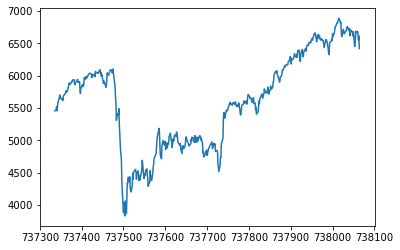

In [12]:
import matplotlib.pyplot as plt

plt.plot(list_of_day, list_of_ouverture)
